In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans

In [35]:
dri= pd.read_csv(r'C:\Users\excel\OneDrive\Desktop\driver-data.csv')

In [36]:
dri.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [37]:
features= dri.drop('id',axis=1)

In [38]:
features

,mean_dist_day,mean_over_speed_perc
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25
...,...,...
3995,160.04,10
3996,176.17,5
3997,170.91,12
3998,176.14,5


In [39]:
kmean= KMeans(n_clusters=4)

In [40]:
cluster= kmean.fit(features)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [41]:
np.unique(cluster.labels_)

array([0, 1, 2, 3])

In [42]:
cluster.cluster_centers_

array([[ 49.98428468,   5.21441441],
       [180.34311782,  10.52011494],
       [177.83509615,  70.28846154],
       [ 50.46127059,  32.42823529]])

In [43]:
dri['cluster']= cluster.labels_

In [44]:
dri

,id,mean_dist_day,mean_over_speed_perc,cluster
0,3423311935,71.24,28,3
1,3423313212,52.53,25,3
2,3423313724,64.54,27,3
3,3423311373,55.69,22,3
4,3423310999,54.58,25,3
...,...,...,...,...
3995,3423310685,160.04,10,1
3996,3423312600,176.17,5,1
3997,3423312921,170.91,12,1
3998,3423313630,176.14,5,1


In [45]:
dri[dri['cluster']==2]

,id,mean_dist_day,mean_over_speed_perc,cluster
3200,3423314190,179.22,95,2
3201,3423314144,192.34,69,2
3202,3423314442,140.25,92,2
3203,3423313001,184.28,70,2
3204,3423311047,200.58,50,2
...,...,...,...,...
3315,3423313871,177.20,87,2
3316,3423310955,182.40,83,2
3317,3423314016,189.88,97,2
3318,3423310913,214.17,73,2


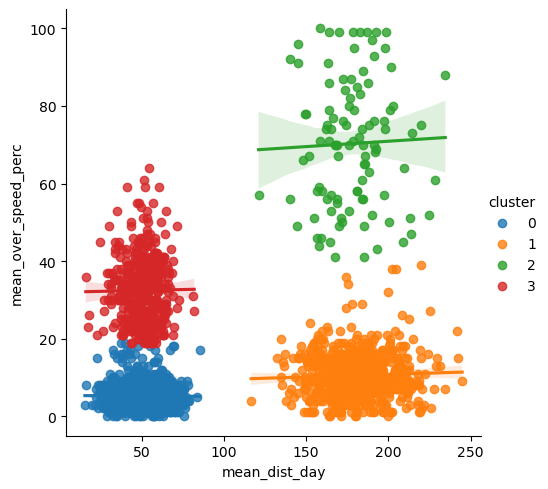

In [46]:
sns.lmplot(data=dri, x='mean_dist_day',y='mean_over_speed_perc',hue='cluster')

In [47]:
cluster.cluster_centers_

array([[ 49.98428468,   5.21441441],
       [180.34311782,  10.52011494],
       [177.83509615,  70.28846154],
       [ 50.46127059,  32.42823529]])

In [59]:
w=[]
for i in range(1,11):
    kmeans= KMeans(n_clusters=i)
    kmeans.fit(features)
    w.append(kmeans.inertia_);

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\clust

In [53]:
print(w)

[12184626.129627973, 1316420.850947719, 992634.0606702473, 719601.1096991898, 534734.3446948869, 372842.35630034003, 319742.71046994976, 276969.5738058287, 252766.71783680838, 230048.33977036297]


In [54]:
kmeans.inertia_

230048.33977036297

In [56]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Intertia')

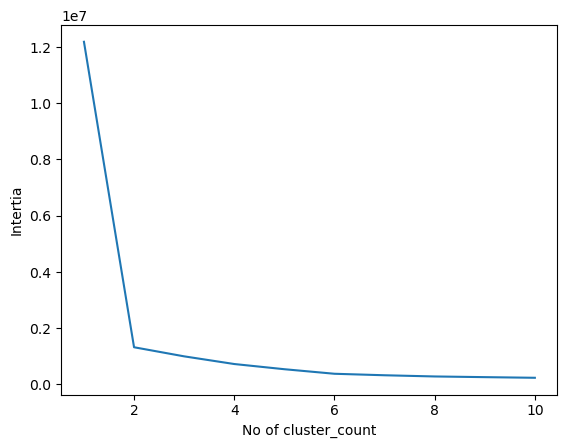

In [58]:
plt.plot(range(1,11),w)
plt.xlabel('No of cluster_count')
plt.ylabel('Intertia')

# Hierarchial Clustering

In [70]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import mean_squared_error,silhouette_score

In [63]:
zoo= pd.read_csv( r'C:\Users\excel\OneDrive\Desktop\zoo.csv')

In [64]:
zoo.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [67]:
features= zoo.drop(['animal_name','class_type'],axis=1)

In [77]:
features

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


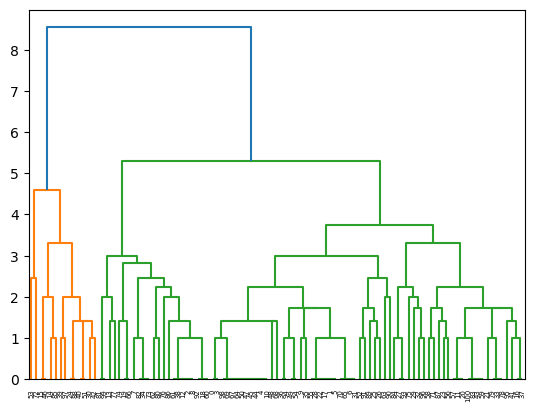

In [78]:
## methods-- single,average,complete,centroid
dendogram= sch.dendrogram(sch.linkage(features, method='complete'))

In [93]:
agg= AgglomerativeClustering(n_clusters=6,linkage='complete')

In [94]:
agg_v= agg.fit(features)
agg_v.labels_

array([1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 4, 2, 2, 0, 0, 4, 1, 2, 2, 4, 4,
       1, 4, 0, 1, 1, 5, 1, 5, 0, 1, 5, 4, 2, 1, 1, 4, 2, 0, 0, 4, 0, 4,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 3, 1, 1, 4, 4, 4, 4, 2, 2, 2, 1, 1, 1,
       2, 1, 1, 1, 1, 4, 3, 2, 2, 5, 2, 2, 4, 4, 2, 2, 2, 4, 5, 0, 2, 4,
       0, 1, 1, 1, 2, 5, 1, 4, 5, 0, 1, 2, 4], dtype=int64)

In [95]:
silhouette_score(features,agg_v.labels_)

0.42405313809442846

# DBSCAN

In [103]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [104]:
df= pd.read_csv(r'C:\Users\excel\OneDrive\Desktop\DB_dataset.csv')

In [105]:
df.head()

,Weight,Height
0,67.062924,176.086355
1,68.804094,178.388668
2,60.930863,170.284496
3,59.733843,168.691992
4,65.431230,173.763679


In [106]:
df.describe()

,Weight,Height
count,500.000000,500.000000
mean,61.270240,169.515781
std,5.196976,4.805095
min,50.433644,160.182164
25%,57.772791,166.607599
50%,61.961518,169.726252
75%,65.439332,172.837284
max,70.700456,178.894770


In [107]:
std= StandardScaler()

In [110]:
df_new= pd.DataFrame(std.fit_transform(df),columns=df.columns)

In [111]:
df_new

,Weight,Height
0,1.115742,1.368788
1,1.451113,1.848408
2,-0.065368,0.160139
3,-0.295929,-0.171612
4,0.801458,0.884926
...,...,...
495,-0.249097,0.034156
496,0.992642,1.064476
497,-1.476478,-1.582524
498,-2.087262,-1.816746


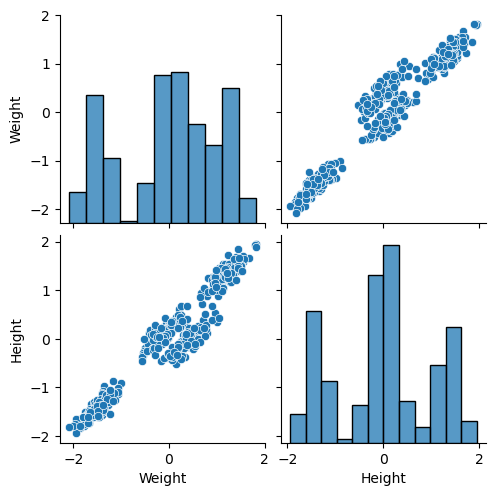

In [113]:
sns.pairplot(df_new)

In [153]:

min_samples= range(1,10)
eps= [0.1,0.2,0.3,0.4,0.5]


In [154]:
output=[]
for mn in min_samples:
    for ep in eps:
        labels= DBSCAN(eps=ep,min_samples=mn).fit(df_new).labels_
        score= silhouette_score(df_new,labels)
        output.append((mn,ep,score))

In [159]:
output

[(1, 0.1, -0.04299681057231643),
 (1, 0.2, 0.4246458392966885),
 (1, 0.3, 0.6636830126381724),
 (1, 0.4, 0.6636830126381724),
 (1, 0.5, 0.6636830126381724),
 (2, 0.1, 0.2832200472847609),
 (2, 0.2, 0.4246458392966885),
 (2, 0.3, 0.6636830126381724),
 (2, 0.4, 0.6636830126381724),
 (2, 0.5, 0.6636830126381724),
 (3, 0.1, 0.42737747491884875),
 (3, 0.2, 0.4246458392966885),
 (3, 0.3, 0.6636830126381724),
 (3, 0.4, 0.6636830126381724),
 (3, 0.5, 0.6636830126381724),
 (4, 0.1, 0.5359027025302264),
 (4, 0.2, 0.6793428586100531),
 (4, 0.3, 0.6636830126381724),
 (4, 0.4, 0.6636830126381724),
 (4, 0.5, 0.6636830126381724),
 (5, 0.1, 0.4827750201294571),
 (5, 0.2, 0.6791715296437162),
 (5, 0.3, 0.41849097827454546),
 (5, 0.4, 0.6636830126381724),
 (5, 0.5, 0.6636830126381724),
 (6, 0.1, 0.4076103765285375),
 (6, 0.2, 0.6811897093459002),
 (6, 0.3, 0.41849097827454546),
 (6, 0.4, 0.6636830126381724),
 (6, 0.5, 0.6636830126381724),
 (7, 0.1, 0.4749535686603094),
 (7, 0.2, 0.6811897093459002),
 (7

In [142]:
print(eps)

[0.1]


In [161]:
a=pd.DataFrame(output)

In [181]:
a.iloc[:,0:3].max()

0    9.00000
1    0.50000
2    0.68119
dtype: float64

<Axes: >

<Figure size 1200x700 with 0 Axes>

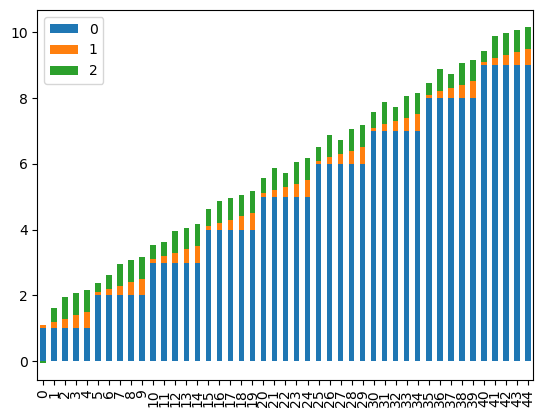

In [173]:
plt.figure(figsize=(12,7))
a.plot(kind='bar',stacked=True)

In [167]:
labels= DBSCAN(eps=0.2,min_samples=8).fit(df_new).labels_

<Axes: xlabel='Weight', ylabel='Height'>

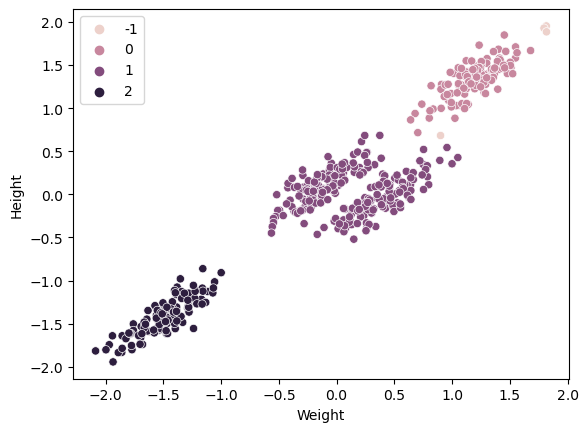

In [169]:
sns.scatterplot(x=df_new['Weight'],y=df_new['Height'],hue=labels)